<a href="https://colab.research.google.com/github/chrisvinsonk/Stock_Price_Predictor_LSTM/blob/main/Stock_Price_Predictor_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage pandas numpy matplotlib scikit-learn tensorflow


In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Initialize Alpha Vantage TimeSeries object
api_key = "E0Q5RFT3WGJOZWYO"
ts = TimeSeries(key=api_key, output_format='pandas')

# Get historical data for the specified stock (e.g., Apple)
symbol = 'AAPL'
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-14,220.57,223.0300,219.70,221.72,39839024.0
2024-08-13,219.01,221.8900,219.01,221.27,44155331.0
2024-08-12,216.07,219.5099,215.60,217.53,38028092.0
2024-08-09,212.10,216.7800,211.97,216.24,42201646.0
2024-08-08,213.11,214.2000,208.83,213.31,47161149.0
...,...,...,...,...,...
1999-11-05,84.62,88.3700,84.00,88.31,3721500.0
1999-11-04,82.06,85.3700,80.62,83.62,3384700.0
1999-11-03,81.62,83.2500,81.00,81.50,2932700.0


In [ ]:
# Select and sort data
data = data['4. close']
data = data.sort_index(ascending=True)
data.head()

,4. close
date,
1999-11-01,77.62
1999-11-02,80.25
1999-11-03,81.50
1999-11-04,83.62
1999-11-05,88.31


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences of input-output pairs
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape to 3D array


In [ ]:
print(X.shape)
print(y.shape)

(6176, 60, 1)
(6176,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - loss: 0.0184
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0022
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 0.0020
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.0014
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 0.0013
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.0014
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.0015
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 0.0015
Epoch 9/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 0.0013
Epoch 10/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 0.0012
Epoch 11/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 9.8972e-04
Epoch 12/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 8.1635e-04
Epoch 13/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 7.7818e-04
Epoch 14/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - loss: 9.5183e-04
Epoch 15/20
1

In [ ]:
!pip install visualkeras
import visualkeras
from PIL import ImageFont

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 27.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


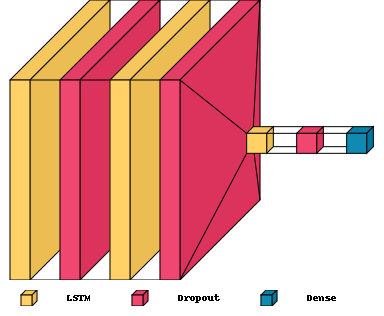

In [ ]:
visualkeras.layered_view(model, legend=True,spacing=30)

193/193 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step


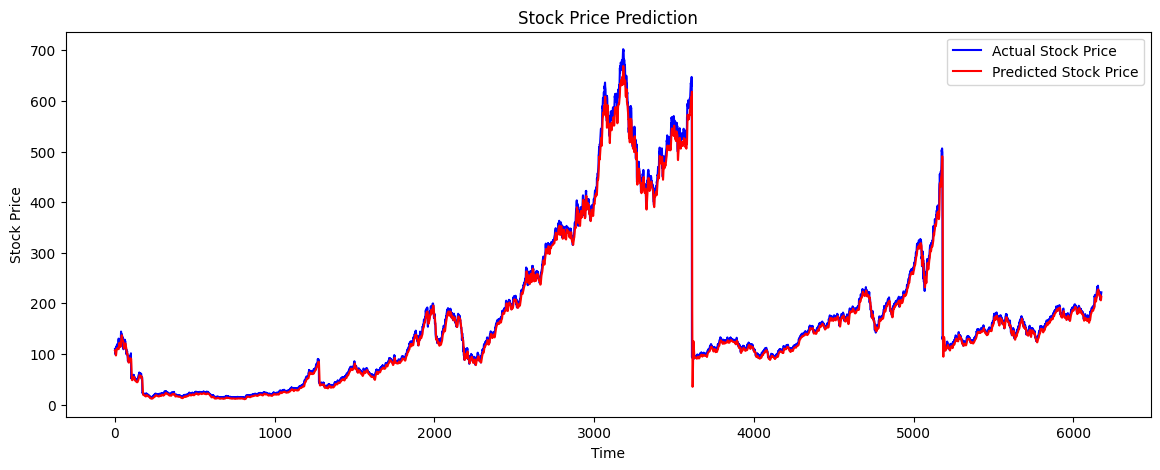

In [ ]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_actual, color='blue', label='Actual Stock Price')
plt.plot(y_pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Save the model
model.save('stock_price_lstm_model.h5')

# Example: Load the model and make a prediction
from tensorflow.keras.models import load_model
model = load_model('stock_price_lstm_model.h5')

# Make a prediction for a new sequence
def predict_stock_price(input_sequence):
    input_sequence = input_sequence.values.reshape(-1, 1)  # Reshape to 2D array
    input_sequence = scaler.transform(input_sequence)
    input_sequence = scaler.transform(input_sequence)
    input_sequence = np.reshape(input_sequence, (1, input_sequence.shape[0], 1))
    predicted_price = model.predict(input_sequence)
    predicted_price = scaler.inverse_transform(predicted_price)
    return predicted_price[0][0]

# Example input sequence
input_sequence = data[-sequence_length:]
predicted_price = predict_stock_price(input_sequence)
print(f"Predicted Stock Price: {predicted_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
Predicted Stock Price: -2.124990224838257
